**Fin 585**  
**Diether**  
**Problem Set**  
**Intro to Python/Pandas**  

**Overview**

This problem set is designed to introduce you to using Python for empirical analysis. You can discuss this problem set and get coding help from other students in the class. But you must prepare your own answers. This assignment will be graded based on effort. Do your best, don’t worry if you can’t answer all the questions. We will discuss the problem set in class. You may find [Pandas Documentation](http://pandas.pydata.org/) useful.

*Please submit you Jupyter notebook to Learning Suite before class.*


**Learning Objectives**

The goal of this homework is to give you practice with some of the core concepts I highlighted in the introduction:

+ Getting data into a dataframe and working with this core data structure. For example, hopefully you take advantage of a dataframe's built in functions (methods) to answer some of the questions.<br>

+ Printing out data using various methods.<br>

+ Selecting data and creating variaables using if/then/else logic.<br>

+ Your first use of the groupby/apply pandas programming framework.<br>


**Data Analysis with Python/Pandas**

You can download the data for the problem set here: [Monthly Stock Return and Analyst Data](http://diether.org/prephd/02-mstk_analysts.csv). There is also a link to the data on the schedule page of *Learning Suite*. The data are monthly observations for all stocks listed in the United States during 2020 The data contain the following variables:

|Variable | Description                                              |
|---------|----------------------------------------------------------|
|permno   | stock identifier                                         |
|caldt    | calendar date                                            |
|ticker   | another stock identifier                                 |
|ret      | monthly return                                           |
|prc      | stock price                                              |   
|me       | market value of equity (in millions)                     |
|analysts | number of analysts covering the stock                    |


**Tasks and Questions**

1. Print out the first 10 observations of the data.<br>

2. Create a new column in the dataframe the contains the natural log of (1 + analysts).<br>

3. During June of 2020, what is the price of Hormel's stock? Note, the ticker symbol for Hormel is HRL.<br>

4. What is the average number of analysts covering Tesla during 2023? Note, the ticker symbol for Tesla is TSLA.<br>

5. Creat a new column in the dataframe that is True if the number of analysts is greater than 10 and False otherwise. <br>

6. Harder questions: questions 6-8 increase the difficulty. Do your best. Hint, use the `groupby` command. Compute the number of stocks in the dataframe by month.<br>

8. Compute the aggregate market-cap of all stocks in the dataframe by month.<br>

9. Create a new dataframe (call it sub) that contains all the observations of Google (ticker=GOOG) and Microsoft (MSFT).<br>


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://diether.org/prephd/02-mstk_analysts.csv',parse_dates=['caldt'])

<br>**Q1.** Print out the first 10 observations of the data.

In [3]:
df[:10]

,permno,caldt,ticker,prc,ret,me,analysts
0,10026,2020-01-31,JJSF,165.84000,-0.100016,3137.526960,3.0
1,10026,2020-02-28,JJSF,160.82001,-0.030270,3042.553769,2.0
2,10026,2020-03-31,JJSF,121.00000,-0.244031,2285.448000,2.0
3,10026,2020-04-30,JJSF,127.03000,0.049835,2399.342640,2.0
4,10026,2020-05-29,JJSF,128.63000,0.012596,2429.563440,2.0
5,10026,2020-06-30,JJSF,127.13000,-0.007191,2401.231440,2.0
6,10026,2020-07-31,JJSF,123.13000,-0.031464,2326.541350,3.0
7,10026,2020-08-31,JJSF,135.95000,0.104118,2568.775250,3.0
8,10026,2020-09-30,JJSF,130.39000,-0.036668,2466.326850,3.0
9,10026,2020-10-30,JJSF,135.57001,0.039727,2564.306739,2.0


In [4]:
df.loc[:10,]

,permno,caldt,ticker,prc,ret,me,analysts
0,10026,2020-01-31,JJSF,165.84000,-0.100016,3137.526960,3.0
1,10026,2020-02-28,JJSF,160.82001,-0.030270,3042.553769,2.0
2,10026,2020-03-31,JJSF,121.00000,-0.244031,2285.448000,2.0
3,10026,2020-04-30,JJSF,127.03000,0.049835,2399.342640,2.0
4,10026,2020-05-29,JJSF,128.63000,0.012596,2429.563440,2.0
5,10026,2020-06-30,JJSF,127.13000,-0.007191,2401.231440,2.0
6,10026,2020-07-31,JJSF,123.13000,-0.031464,2326.541350,3.0
7,10026,2020-08-31,JJSF,135.95000,0.104118,2568.775250,3.0
8,10026,2020-09-30,JJSF,130.39000,-0.036668,2466.326850,3.0
9,10026,2020-10-30,JJSF,135.57001,0.039727,2564.306739,2.0


In [5]:
df.head(10)

,permno,caldt,ticker,prc,ret,me,analysts
0,10026,2020-01-31,JJSF,165.84000,-0.100016,3137.526960,3.0
1,10026,2020-02-28,JJSF,160.82001,-0.030270,3042.553769,2.0
2,10026,2020-03-31,JJSF,121.00000,-0.244031,2285.448000,2.0
3,10026,2020-04-30,JJSF,127.03000,0.049835,2399.342640,2.0
4,10026,2020-05-29,JJSF,128.63000,0.012596,2429.563440,2.0
5,10026,2020-06-30,JJSF,127.13000,-0.007191,2401.231440,2.0
6,10026,2020-07-31,JJSF,123.13000,-0.031464,2326.541350,3.0
7,10026,2020-08-31,JJSF,135.95000,0.104118,2568.775250,3.0
8,10026,2020-09-30,JJSF,130.39000,-0.036668,2466.326850,3.0
9,10026,2020-10-30,JJSF,135.57001,0.039727,2564.306739,2.0


<br>**Q2.** Create a new column in the dataframe the contains the natural log of (1 + analysts).

In [6]:
df['logalyst'] = np.log(1 + df['analysts'])
df.tail()

,permno,caldt,ticker,prc,ret,me,analysts,logalyst
195670,93436,2023-08-31,TSLA,258.07999,-0.034962,819144.33978,30.0,3.433987
195671,93436,2023-09-29,TSLA,250.22000,-0.030456,795449.38000,32.0,3.496508
195672,93436,2023-10-31,TSLA,200.84000,-0.197346,638454.49364,32.0,3.496508
195673,93436,2023-11-30,TSLA,240.08000,0.195379,763195.35368,32.0,3.496508
195674,93436,2023-12-29,TSLA,248.48000,0.034988,791408.80000,34.0,3.555348


In [7]:
df['logalyst'] = df.eval("log(1+analysts)")
df.tail()

,permno,caldt,ticker,prc,ret,me,analysts,logalyst
195670,93436,2023-08-31,TSLA,258.07999,-0.034962,819144.33978,30.0,3.433987
195671,93436,2023-09-29,TSLA,250.22000,-0.030456,795449.38000,32.0,3.496508
195672,93436,2023-10-31,TSLA,200.84000,-0.197346,638454.49364,32.0,3.496508
195673,93436,2023-11-30,TSLA,240.08000,0.195379,763195.35368,32.0,3.496508
195674,93436,2023-12-29,TSLA,248.48000,0.034988,791408.80000,34.0,3.555348


<br>**Q3.** During June of 2020, what is the price of Hormel's stock?

In [8]:
df[(df['ticker'] == 'HRL') & (df['caldt'] == '2020-06-30')]

,permno,caldt,ticker,prc,ret,me,analysts,logalyst
114212,32870,2020-06-30,HRL,48.27,-0.011468,26015.21304,11.0,2.484907


In [9]:
df.loc[(df['ticker'] == 'HRL') & (df['caldt'] == '2020-06-30')]

,permno,caldt,ticker,prc,ret,me,analysts,logalyst
114212,32870,2020-06-30,HRL,48.27,-0.011468,26015.21304,11.0,2.484907


In [10]:
df.query("ticker == 'HRL' and caldt == '2020-06-30'")

/tmp/ipykernel_42381/2423888476.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query("ticker == 'HRL' and caldt == '2020-06-30'")


,permno,caldt,ticker,prc,ret,me,analysts,logalyst
114212,32870,2020-06-30,HRL,48.27,-0.011468,26015.21304,11.0,2.484907


In [11]:
df.query("ticker == 'HRL' and  '2020-06-01' <= caldt <= '2020-06-30'")

,permno,caldt,ticker,prc,ret,me,analysts,logalyst
114212,32870,2020-06-30,HRL,48.27,-0.011468,26015.21304,11.0,2.484907


<br>**Q4.** average number of analysts covering Tesla?

In [12]:
df.query("ticker == 'TSLA'")['analysts'].mean()

28.4375

In [13]:
df.loc[df['ticker'] == 'TSLA','analysts'].mean()

28.4375

<br>

**The Following Works But It's Generally a Bad Idea**

+ Avoid brackets againts brackets.

+ Vast majority of time will work just fine, but can lead to subtle errors in certain conditions.

In [14]:
df.loc[df['ticker'] == 'TSLA']['analysts'].mean()

28.4375

<br>**Q5.** New column where analysts is greater than 10

In [15]:
df['high'] = df['analysts'] > 10
df.head()

,permno,caldt,ticker,prc,ret,me,analysts,logalyst,high
0,10026,2020-01-31,JJSF,165.84000,-0.100016,3137.526960,3.0,1.386294,False
1,10026,2020-02-28,JJSF,160.82001,-0.030270,3042.553769,2.0,1.098612,False
2,10026,2020-03-31,JJSF,121.00000,-0.244031,2285.448000,2.0,1.098612,False
3,10026,2020-04-30,JJSF,127.03000,0.049835,2399.342640,2.0,1.098612,False
4,10026,2020-05-29,JJSF,128.63000,0.012596,2429.563440,2.0,1.098612,False


<br>**Q6.** Stocks in the dataframe by month

In [16]:
df.groupby('caldt')['permno'].count()

caldt
2020-01-31    3591
2020-02-28    3593
2020-03-31    3586
2020-04-30    3580
2020-05-29    3575
2020-06-30    3580
2020-07-31    3587
2020-08-31    3600
2020-09-30    3629
2020-10-30    3669
2020-11-30    3702
2020-12-31    3738
2021-01-29    3775
2021-02-26    3829
2021-03-31    3925
2021-04-30    4005
2021-05-28    4055
2021-06-30    4103
2021-07-30    4170
2021-08-31    4205
2021-09-30    4246
2021-10-29    4289
2021-11-30    4333
2021-12-31    4375
2022-01-31    4405
2022-02-28    4423
2022-03-31    4432
2022-04-29    4442
2022-05-31    4439
2022-06-30    4433
2022-07-29    4423
2022-08-31    4429
2022-09-30    4428
2022-10-31    4405
2022-11-30    4393
2022-12-30    4303
2023-01-31    4285
2023-02-28    4261
2023-03-31    4226
2023-04-28    4212
2023-05-31    4193
2023-06-30    4179
2023-07-31    4160
2023-08-31    4137
2023-09-29    4123
2023-10-31    4099
2023-11-30    4073
2023-12-29    4032
Name: permno, dtype: int64

<Axes: xlabel='caldt'>

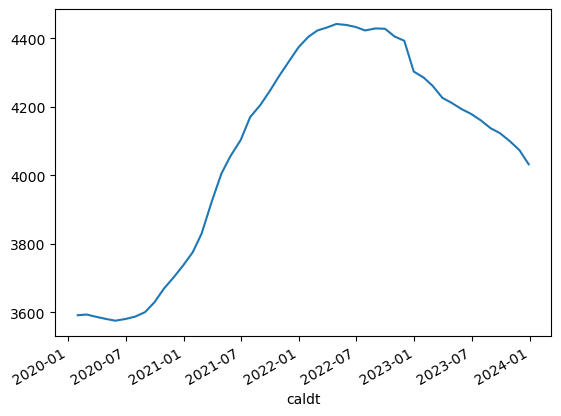

In [17]:
df.groupby('caldt')['permno'].count().plot()

**Q8.** Compute the aggregate market-cap of all stocks in the dataframe by month.

In [18]:
df.groupby('caldt')['me'].sum().round(1)

caldt
2020-01-31    31546840.0
2020-02-28    28942830.4
2020-03-31    25035509.8
2020-04-30    28395941.3
2020-05-29    29962357.1
2020-06-30    30732608.6
2020-07-31    32550922.1
2020-08-31    35034063.1
2020-09-30    33820768.1
2020-10-30    33118043.4
2020-11-30    37265860.4
2020-12-31    39106760.9
2021-01-29    39134094.6
2021-02-26    40280788.6
2021-03-31    41749097.8
2021-04-30    43949648.2
2021-05-28    44088099.8
2021-06-30    45396487.8
2021-07-30    46011290.5
2021-08-31    47317989.4
2021-09-30    45319502.4
2021-10-29    48322694.8
2021-11-30    47610630.4
2021-12-31    49045659.6
2022-01-31    45941177.7
2022-02-28    44864229.5
2022-03-31    46081346.3
2022-04-29    41670422.5
2022-05-31    41429909.4
2022-06-30    37835309.0
2022-07-29    41375996.3
2022-08-31    39769723.5
2022-09-30    36042673.6
2022-10-31    38796660.3
2022-11-30    40529331.2
2022-12-30    37954431.4
2023-01-31    40557220.0
2023-02-28    39499713.6
2023-03-31    40471186.1
2023-04-28    40800

**Q9.** Create a new dataframe (call it sub) that contains all the observations of Google (ticker=GOOG) and Microsoft (MSFT).

In [19]:
sub = df.query("ticker == 'GOOG' or ticker == 'MSFT'")
sub

,permno,caldt,ticker,prc,ret,me,analysts,logalyst,high
307,10107,2020-01-31,MSFT,170.23000,0.079455,1.294777e+06,34.0,3.555348,True
308,10107,2020-02-28,MSFT,162.00999,-0.045292,1.232256e+06,32.0,3.496508,True
309,10107,2020-03-31,MSFT,157.71001,-0.026542,1.197019e+06,32.0,3.496508,True
310,10107,2020-04-30,MSFT,179.21001,0.136326,1.359028e+06,32.0,3.496508,True
311,10107,2020-05-29,MSFT,183.25000,0.025389,1.389665e+06,30.0,3.433987,True
...,...,...,...,...,...,...,...,...,...
21620,14542,2023-08-31,GOOG,137.35001,0.031853,7.967674e+05,37.0,3.637586,True
21621,14542,2023-09-29,GOOG,131.85001,-0.040044,7.574783e+05,38.0,3.663562,True
21622,14542,2023-10-31,GOOG,125.30000,-0.049678,7.173425e+05,39.0,3.688879,True
21623,14542,2023-11-30,GOOG,133.92000,0.068795,7.666920e+05,38.0,3.663562,True


In [20]:
sub = df.query("ticker in ['GOOG','MSFT']").reset_index(drop=True)
sub

,permno,caldt,ticker,prc,ret,me,analysts,logalyst,high
0,10107,2020-01-31,MSFT,170.23000,0.079455,1.294777e+06,34.0,3.555348,True
1,10107,2020-02-28,MSFT,162.00999,-0.045292,1.232256e+06,32.0,3.496508,True
2,10107,2020-03-31,MSFT,157.71001,-0.026542,1.197019e+06,32.0,3.496508,True
3,10107,2020-04-30,MSFT,179.21001,0.136326,1.359028e+06,32.0,3.496508,True
4,10107,2020-05-29,MSFT,183.25000,0.025389,1.389665e+06,30.0,3.433987,True
...,...,...,...,...,...,...,...,...,...
91,14542,2023-08-31,GOOG,137.35001,0.031853,7.967674e+05,37.0,3.637586,True
92,14542,2023-09-29,GOOG,131.85001,-0.040044,7.574783e+05,38.0,3.663562,True
93,14542,2023-10-31,GOOG,125.30000,-0.049678,7.173425e+05,39.0,3.688879,True
94,14542,2023-11-30,GOOG,133.92000,0.068795,7.666920e+05,38.0,3.663562,True
